In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)


In [2]:
lines = {
    "Western": ["Andheri", "Bandra", "Dadar", "Borivali"],
    "Central": ["Kurla", "Ghatkopar", "Dadar", "Thane"],
    "Harbour": ["Vashi", "Nerul", "Panvel"]
}

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


In [3]:
def get_crowd_level(hour, is_weekend, station):
    if is_weekend:
        if 11 <= hour <= 20:
            return "Medium"
        else:
            return "Low"
    else:
        if hour in range(8, 11) or hour in range(18, 22):
            if station in ["Dadar", "Andheri", "Kurla"]:
                return "Extreme"
            return "High"
        elif 11 <= hour <= 17:
            return "Medium"
        else:
            return "Low"


In [4]:
rows = []

for line, stations in lines.items():
    for station in stations:
        for day in days:
            for hour in range(24):
                is_weekend = 1 if day in ["Saturday", "Sunday"] else 0
                is_peak_hour = 1 if hour in list(range(8,11)) + list(range(18,22)) else 0
                
                crowd_level = get_crowd_level(hour, is_weekend, station)
                
                rows.append([
                    line,
                    station,
                    hour,
                    day,
                    is_weekend,
                    is_peak_hour,
                    crowd_level
                ])

df = pd.DataFrame(rows, columns=[
    "line", "station", "hour", "day_of_week",
    "is_weekend", "is_peak_hour", "crowd_level"
])

df.head()


,line,station,hour,day_of_week,is_weekend,is_peak_hour,crowd_level
0,Western,Andheri,0,Monday,0,0,Low
1,Western,Andheri,1,Monday,0,0,Low
2,Western,Andheri,2,Monday,0,0,Low
3,Western,Andheri,3,Monday,0,0,Low
4,Western,Andheri,4,Monday,0,0,Low


In [5]:
df.to_csv("../data/raw/mumbai_local_crowd_data.csv", index=False)
print("Dataset saved successfully!")


Dataset saved successfully!


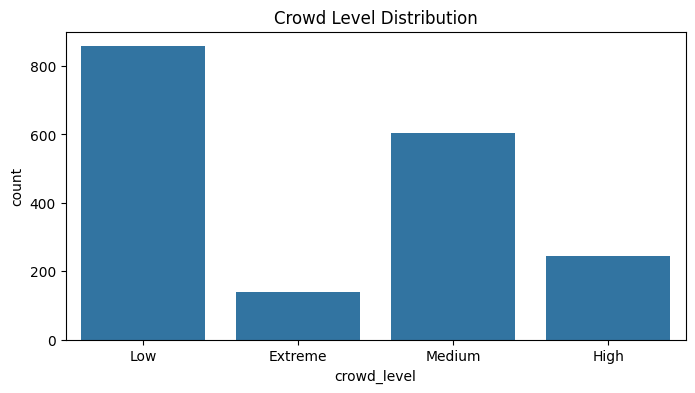

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(x="crowd_level", data=df)
plt.title("Crowd Level Distribution")
plt.show()


## 6.5 Relationship Analysis

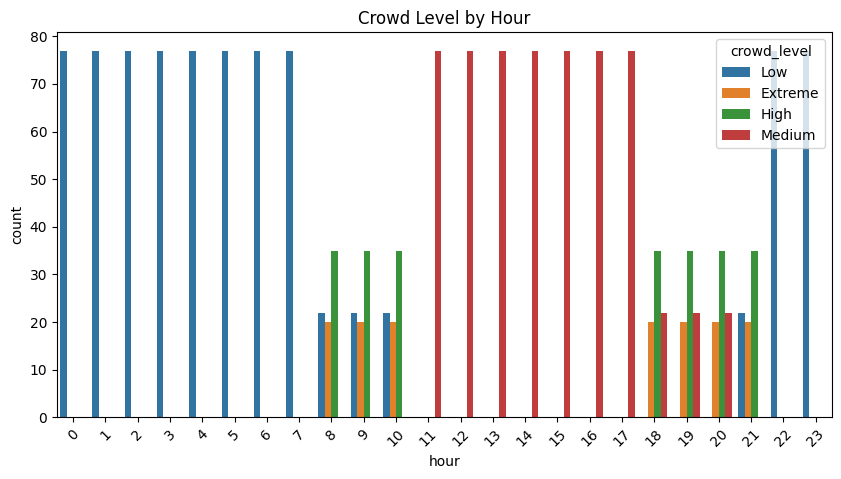

In [8]:
#Crowd vs Hour
plt.figure(figsize=(10,5))
sns.countplot(x="hour", hue="crowd_level", data=df)
plt.title("Crowd Level by Hour")
plt.xticks(rotation=45)
plt.show()


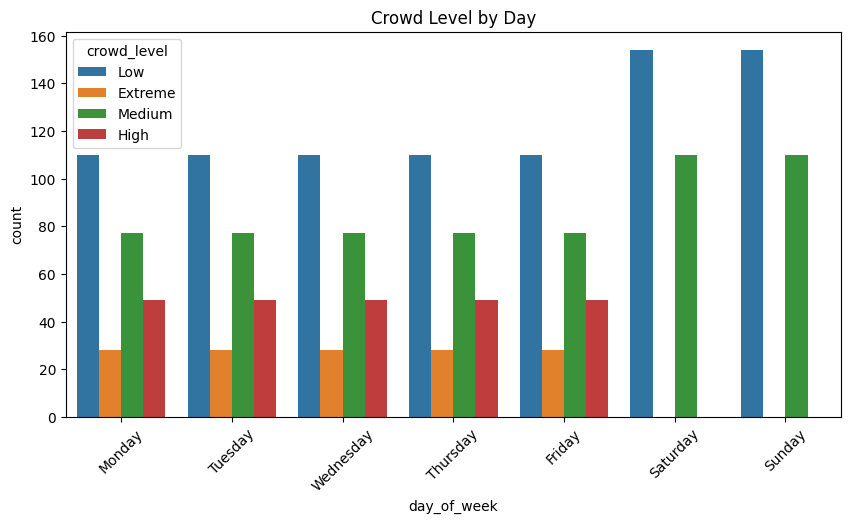

In [9]:
#Crowd vs Day

plt.figure(figsize=(10,5))
sns.countplot(x="day_of_week", hue="crowd_level", data=df)
plt.title("Crowd Level by Day")
plt.xticks(rotation=45)
plt.show()


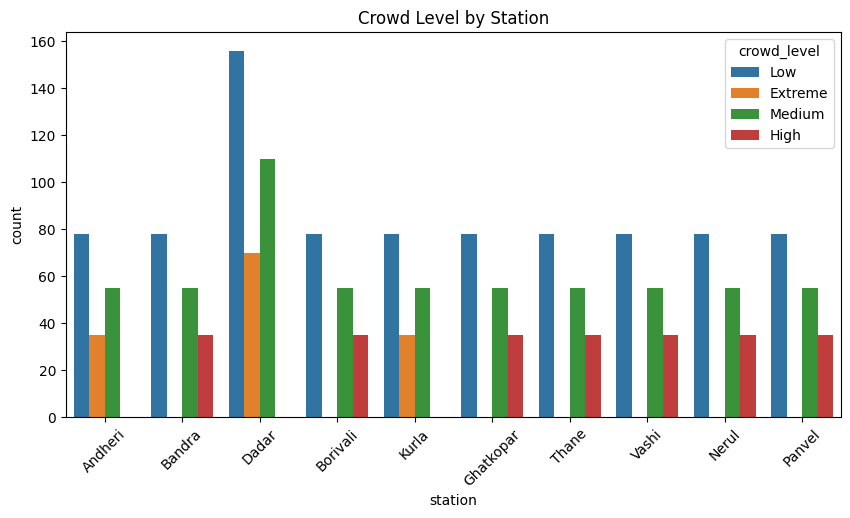

In [10]:
# Crowd vs Station

plt.figure(figsize=(10,5))
sns.countplot(x="station", hue="crowd_level", data=df)
plt.title("Crowd Level by Station")
plt.xticks(rotation=45)
plt.show()


“Analysis shows that extreme crowd levels occur mainly during morning (8–10 AM) and evening (6–9 PM) peak hours. Major junction stations such as Dadar and Andheri experience higher crowd intensity compared to smaller stations. Weekends show relatively lower extreme crowding, indicating reduced office travel.”